In [1]:
from nepc import nepc
from nepc.util import plotter
from nepc.util import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
pd.set_option('max_colwidth', 120)

In [3]:
cnx, cursor = nepc.connect(local=True)

In [4]:
type(cnx)

mysql.connector.connection.MySQLConnection

In [5]:
type(cursor)

mysql.connector.cursor.MySQLCursor

In [6]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3,4
0,1,1,N,N,"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": """", ""..."
1,2,1,N_2s22p3_4So,N($2s^22p^3 {}^4S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
2,3,1,N_2s22p3_2Do,N($2s^22p^3 {}^2D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
3,4,1,N_2s22p3_2Po,N($2s^22p^3 {}^2P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
4,5,1,N_2s22p2_3P_3s_4P,N($2s^22p^2$(${}^3P$)3s ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
5,6,1,N_2s22p2_3P_3s_2P,N($2s^22p^2$(${}^3P$)3s ${}^2P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
6,7,1,N_2s22p4_4P,N($2s^22p^4$ ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""4"", ..."
7,8,1,N_2s22p2_3P_3p_2So,N($2s^22p^2$(${}^3P$)3p ${}^2S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
8,9,1,N_2s22p2_3P_3p_4Do,N($2s^22p^2$(${}^3P$)3p ${}^4D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
9,10,1,N_2s22p2_3P_3p_4Po,N($2s^22p^2$(${}^3P$)3p ${}^4P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."


In [7]:
species = nepc.table_as_df(cursor, "species")
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N++,N$^{++}$
4,5,N2,N$_2$
5,6,N2+,N$_2^+$


In [8]:
NEPC_HOME = config.nepc_home()

In [9]:
metdf = pd.read_csv(NEPC_HOME + "/data/formatted/n2/itikawa/c_deexcitation_v_itikawa2006_2.met", sep='\t')

In [10]:
metdf

,Unnamed: 0,specie,process,units_e,units_sigma,ref,lhsA,lhsB,rhsA,rhsB,wavelength,lhs_v,rhs_v,lhs_j,rhs_j,background,lpu,upu
0,NaN,N2,c_deexcitation_v,1.0,1.000000e-22,itikawa2006,N2(c4p1Sigmau+),\N,N2(X1Sigmag+),\N,95.8,0,0,\N,\N,NaN,0.22,0.22


In [11]:
metdb = nepc.cs_metadata(cursor, 28)

In [12]:
metdb

[28,
 'N2',
 'excitation_v',
 1.0,
 1e-20,
 'brunger2003',
 'N2(X1Sigmag+)',
 None,
 'N2(X1Sigmag+)',
 None,
 None,
 0,
 1,
 None,
 None,
 'Brunger, Table 6.4.9b.',
 0.3,
 0.3,
 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 None,
 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 None,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0]

In [14]:
cs_dat_files = pd.read_csv(NEPC_HOME + '/mysql/cs_datfile_local.tsv', delimiter='\t')

In [17]:
cs_id=cs_dat_files['cs_id'][0]
dat_file=cs_dat_files['filename'][0] + ".dat"
print(cs_id, dat_file)

1 /data/formatted/n2/itikawa/total_itikawa2006_2a.dat


In [18]:
df = pd.read_csv(NEPC_HOME + dat_file, delimiter = '\t', usecols = ['e_energy', 'sigma'])

In [19]:
df

,e_energy,sigma
0,0.10,4.88
1,0.12,5.13
2,0.15,5.56
3,0.17,5.85
4,0.20,6.25
5,0.25,6.84
6,0.30,7.32
7,0.35,7.72
8,0.40,8.06
9,0.45,8.33


In [22]:
models = nepc.table_as_df(cursor, "models")
models

,0,1,2
0,1,angus,cross sections used by J. Angus
1,2,pcm_n_1,plasma chemistry model - nitrogen - 1


In [23]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Total elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,elastic_partial,Partial elastic electron scattering,1,1,1,1,0,0,0,0,0,0
2,3,excitation,"""Excitation of atoms (electronic), inelastic electron scattering""",1,1,1,1,0,0,0,0,0,0
3,4,excitation_v,"""Excitation of atoms (electronic + vibrational), inelastic electron scattering""",1,1,1,1,0,0,1,1,0,0
4,5,excitation_j,"""Excitation of atoms (electronic + rotational), inelastic electron scattering""",1,1,1,1,0,0,0,0,1,1
5,6,excitation_vj,"""Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering""",1,1,1,1,0,0,1,1,1,1
6,7,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
7,8,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
8,9,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
9,10,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rotational),1,1,0,0,0,1,1,1,1,1


In [24]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3,4
0,1,1,N,N,"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": """", ""..."
1,2,1,N_2s22p3_4So,N($2s^22p^3 {}^4S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
2,3,1,N_2s22p3_2Do,N($2s^22p^3 {}^2D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
3,4,1,N_2s22p3_2Po,N($2s^22p^3 {}^2P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
4,5,1,N_2s22p2_3P_3s_4P,N($2s^22p^2$(${}^3P$)3s ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
5,6,1,N_2s22p2_3P_3s_2P,N($2s^22p^2$(${}^3P$)3s ${}^2P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
6,7,1,N_2s22p4_4P,N($2s^22p^4$ ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""4"", ..."
7,8,1,N_2s22p2_3P_3p_2So,N($2s^22p^2$(${}^3P$)3p ${}^2S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
8,9,1,N_2s22p2_3P_3p_4Do,N($2s^22p^2$(${}^3P$)3p ${}^4D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
9,10,1,N_2s22p2_3P_3p_4Po,N($2s^22p^2$(${}^3P$)3p ${}^4P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."


In [25]:
nepc.cs_e_sigma(cursor,1)

([0.1,
  0.12,
  0.15,
  0.17,
  0.2,
  0.25,
  0.3,
  0.35,
  0.4,
  0.45,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0],
 [4.88,
  5.13,
  5.56,
  5.85,
  6.25,
  6.84,
  7.32,
  7.72,
  8.06,
  8.33,
  8.61,
  8.96,
  9.25,
  9.48,
  9.66,
  9.85])

In [26]:
angus = nepc.model(cursor, "angus")

In [27]:
len(angus)

367

In [28]:
angus[0]

{'cs_id': 3,
 'specie': 'N2',
 'process': 'excitation',
 'units_e': 1.0,
 'units_sigma': 1e-20,
 'ref': 'itikawa2006',
 'lhsA': 'N2(X1Sigmag+)',
 'lhsB': None,
 'rhsA': 'N2(w1Deltau)',
 'rhsB': None,
 'wavelength': None,
 'lhs_v': None,
 'rhs_v': None,
 'lhs_j': None,
 'rhs_j': None,
 'background': 'From itikawa2006, Table 9.a weighted average of the experimental cross sections has been taken with a polynomial least square fit to the energy dependence of the individual set of the cross sections. Thus the estimated uncertainty indicates the degree of the concurrence of the individual experimental results',
 'lpu': 0.3,
 'upu': 0.3,
 'e': [8.9,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0,
  12.5,
  13.0,
  13.5,
  14.0,
  14.5,
  15.0,
  15.5,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  25.0,
  30.0,
  35.0,
  40.0,
  45.0,
  50.0],
 'sigma': [0.0001,
  0.002,
  0.024,
  0.043,
  0.061,
  0.076,
  0.088,
  0.096,
  0.102,
  0.105,
  0.105,
  0.103,
  0.099,
  0.093,
  0.086,
  0.0

In [29]:
angus_summary = nepc.model_summary_df(angus, lower=0, upper=24)
angus_summary

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,202,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,2.39,135,8.84825e-21,nan,nan
1,366,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,7.94775e-21,nan,nan
2,181,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,5.29548e-21,nan,nan
3,18,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+$) + e$^-$,7.65,14.85,2.57e-21,0.4,0.4
4,8,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a ${}^1\Pi_g$) + e$^-$,8,100,4.73e-21,0.25,0.25
5,16,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B ${}^3\Pi_g$) + e$^-$,8.55,50,3.39e-21,0.35,0.35
6,3,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (w ${}^1\Delta_u$) + e$^-$,8.9,50,1.05e-21,0.3,0.3
7,15,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (W ${}^3\Delta_u$) + e$^-$,9,50,2.38e-21,0.35,0.35
8,9,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a${}^{'}$ ${}^1\Sigma_u^-$) + e$^-$,9.4,50,1.13e-21,0.3,0.3
9,20,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B${}^{'} $ ${}^3\Sigma_u^-$) + e$^-$,10,50,1.65e-21,0.4,0.4


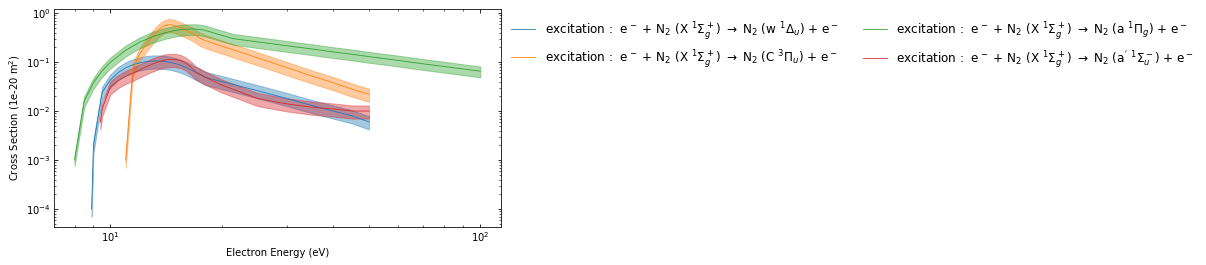

In [31]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, angus, 1E-20,
                        'excitation',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True, max_plots=4, width=8, height=4) 

In [32]:
cnx.close()